Explanation:
This project trains a neural network (ANN) model using the MNIST dataset and visualizes the model's accuracy. It also makes predictions on test data and compares the true and predicted labels to evaluate the model's performance.

Libraries:
pandas, numpy, matplotlib, keras  

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [2]:
(image_train,label_train)=mnist.load_data()[0]
(image_test,label_test)=mnist.load_data()[1]

In [4]:
image_train=image_train.reshape(image_train.shape[0],28*28)
image_test=image_test.reshape(image_test.shape[0],28*28)

image_train=image_train.astype("float32")
image_test=image_test.astype("float32")

image_train=image_train/255
image_test=image_test/255

label_train=to_categorical(label_train,10)
label_test=to_categorical(label_test,10)

In [5]:
model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(28*28,)))
model.add(Dense(216,activation="tanh"))
model.add(Dense(10,activation="softmax"))
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 216)            │       110,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,898 (1.96 MB)

 Trainable params: 514,898 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stopping=EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
history=model.fit(image_train,label_train,
          epochs=10,batch_size=48,validation_split=0.2,
          callbacks=early_stopping)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8938 - loss: 0.3538 - val_accuracy: 0.9684 - val_loss: 0.1081
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9749 - loss: 0.0816 - val_accuracy: 0.9724 - val_loss: 0.0967
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9842 - loss: 0.0496 - val_accuracy: 0.9710 - val_loss: 0.1002
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9732 - val_loss: 0.0987
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9893 - loss: 0.0307 - val_accuracy: 0.9747 - val_loss: 0.1056


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


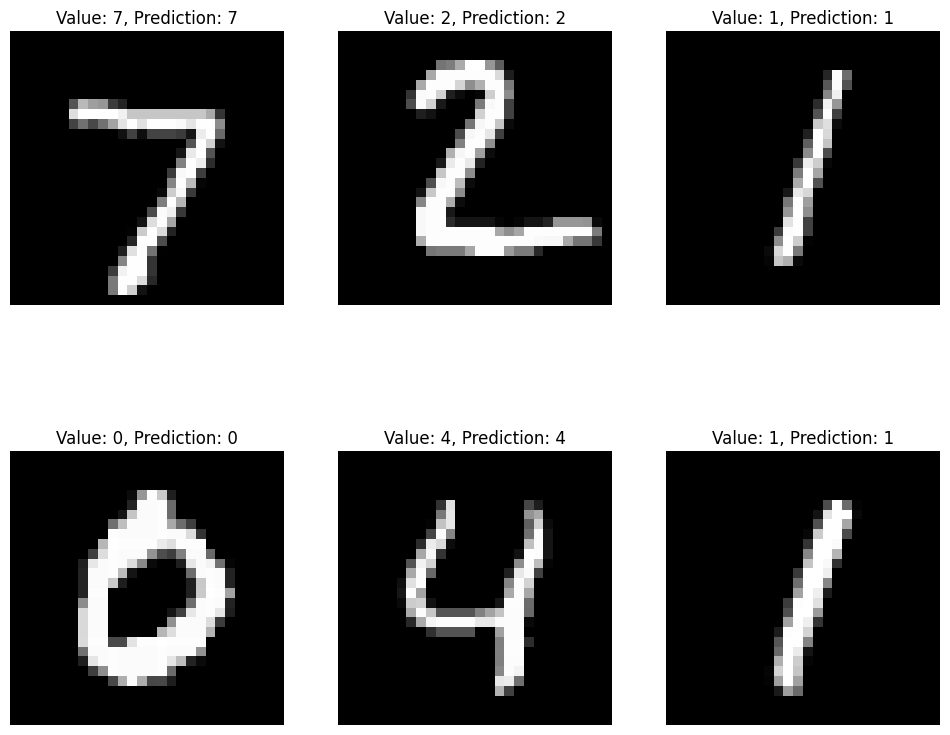

In [12]:
plt.figure(figsize=(12, 10))
for i in range(0,6):
 plt.subplot(2,3,i+1)
 sample = image_test[i].reshape(1, 28 * 28)
 predicted_label = np.argmax(model.predict(sample))
 plt.imshow(image_test[i].reshape(28, 28), cmap="gray")
 plt.title(f"Value: {np.argmax(label_test[i])}, Prediction: {predicted_label}")
 plt.axis("off")
 
plt.show()

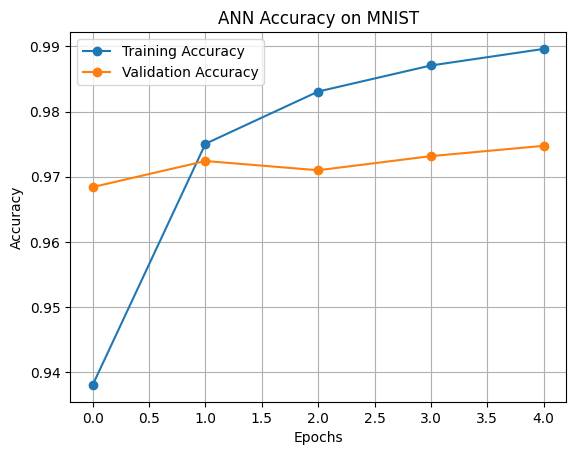

In [7]:
plt.figure()
plt.plot(history.history["accuracy"],marker="o",label="Training Accuracy")
plt.plot(history.history["val_accuracy"],marker="o",label="Validation Accuracy")
plt.title("ANN Accuracy on MNIST")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

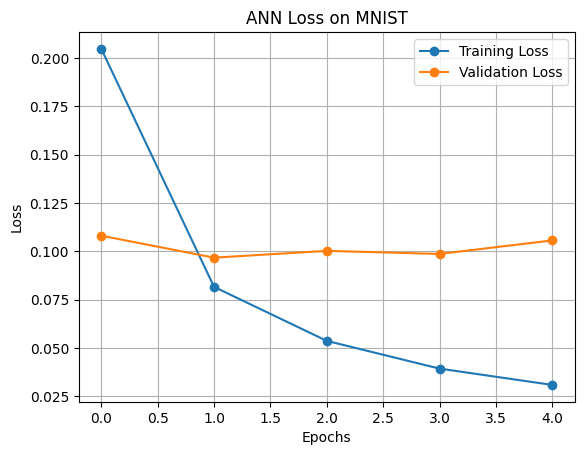

In [8]:
plt.figure()
plt.plot(history.history["loss"],marker="o",label="Training Loss")
plt.plot(history.history["val_loss"],marker="o",label="Validation Loss")
plt.title("ANN Loss on MNIST")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()